<a href="https://colab.research.google.com/github/SimeonHristov99/AI_Traffic_Sign_Classifier_Tensorflow/blob/main/model1_bad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

## Traffic Sign Classifier

### The goal of this project is to build and train a traffic sign classifier. Results were generated in the context of the second  stage  of  the [GTSRB - German Traffic Sign Recognition Benchmark](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign) dataset. The classifier is a convolutional neural network and is implemented using the deep learning framework [Keras](https://keras.io/) from the [TensorFlow](https://www.tensorflow.org/) library.

### Inspired by:
- [CNN Design for Real-Time Traffic Sign Recognition](https://www.sciencedirect.com/science/article/pii/S1877705817341231)
- [Man vs. computer: benchmarking machine learning algorithms for traffic sign recognition](https://christian-igel.github.io/paper/MvCBMLAfTSR.pdf)

TODO:

 - [ ] Work with the data by using a directory iterator instead of loading everything into memory.

In [15]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

from PIL import Image

print(tf.__version__)

2.5.0


# Loading data

In [16]:
# # Run one time only. Requires Kaggle API access key to download the dataset.
# !pip install -q kaggle

# import os
# from google.colab import drive

# drive.mount('/gdrive')

# assert os.getcwd() == '/content'

# os.environ['KAGGLE_CONFIG_DIR'] = '../gdrive/MyDrive/kaggle'

# !kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign -p /content/data/ --unzip

In [17]:
CLASSES = 43
TRAIN_PATH = '/content/data/Train'

X_train = []
y_train = []

for i in range(CLASSES):
  lbl_path = os.path.join(TRAIN_PATH, str(i))

  for img in os.listdir(lbl_path):
    try:
      image = Image.open(lbl_path + '/' + img)
      image = image.resize((30, 30))
      image = np.array(image)

      X_train.append(image)
      y_train.append(i)
    except:
      print('Error loading image')

X_train = np.array(X_train)
y_train = np.array(y_train)

print(f'X_train - {type(X_train)} - {X_train.shape}')
print(f'y_train - {type(y_train)} - {y_train.shape}')

X_train - <class 'numpy.ndarray'> - (39209, 30, 30, 3)
y_train - <class 'numpy.ndarray'> - (39209,)


In [18]:
assert len(np.unique(y_train)) == 43

# Visualizing data

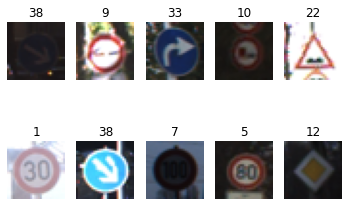

In [19]:
for i in range(10):
  plt.subplot(2, 5, i + 1)
  rand_idx = np.random.randint(X_train.shape[0])
  image = X_train[rand_idx]
  plt.imshow(image)
  plt.axis('off')
  plt.title(y_train[rand_idx])

plt.show()

# Data pre-processing

In [20]:
X_train = X_train / 255.

np.min(X_train), np.max(X_train)

(0.0, 1.0)

# Choosing a model

In [28]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[0]

model = keras.Sequential([
 keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=input_shape),
 keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu'),
 keras.layers.MaxPool2D(),
 keras.layers.Dropout(0.25),
 keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
 keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
 keras.layers.MaxPool2D(),
 keras.layers.Dropout(0.25),
 keras.layers.Flatten(),
 keras.layers.Dense(units=256, activation='relu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=CLASSES, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=64
)

# Evaluation

In [ ]:
# Coming soon ...